## LGM -VIP

## ML Facial recognition to detect mood and suggest songs accordingly 

### Rashmi S

In [67]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

In [69]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [70]:
train_dir = 'fer2013/train/'
test_dir = 'fer2013/test/'

In [71]:
row=48
col=48
classes = 7

In [72]:
def count_expression(path,set_):
    dict_={}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression]=len(os.listdir(dir_))

    df = pd.DataFrame(dict_,index=[set_])
    return df

In [73]:
train_count=count_expression(train_dir,'train_count')
print(train_count)

             angry  disgust  fear  happy  neutral   sad  surprise
train_count   3995      436  4097   7215     4965  4830      3171


In [74]:
test_count=count_expression(test_dir,'test')
print(test_count)

      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1247       831


Text(0.5, 1.0, 'Plot of number of images in train dataset')

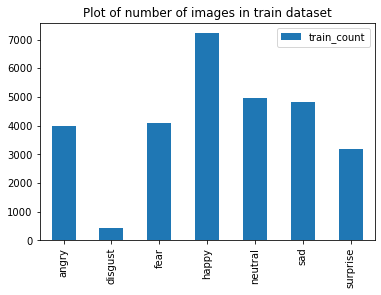

In [75]:
train_count.transpose().plot(kind = "bar")
plt.title('Plot of number of images in train dataset')

Text(0.5, 1.0, 'Plot of number of images in test dataset')

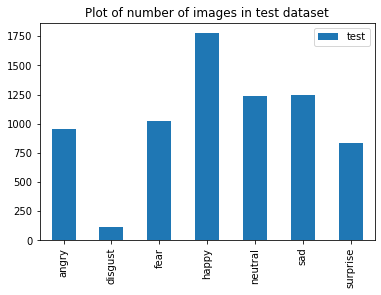

In [76]:
test_count.transpose().plot(kind = "bar")
plt.title('Plot of number of images in test dataset')

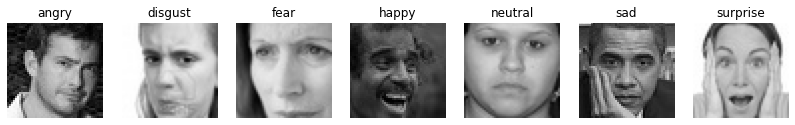

In [77]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = keras.preprocessing.image.load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [78]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,Dense, MaxPooling2D,Flatten,Dropout,Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam,RMSprop,SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint, CSVLogger,TensorBoard,EarlyStopping,ReduceLROnPlateau
import datetime
from tensorflow.keras.utils import plot_model

In [79]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    zoom_range=0.3, 
                                    horizontal_flip=True)


train_set=train_datagen.flow_from_directory(train_dir,
                                            batch_size=64,
                                            target_size=(48,48),
                                            shuffle=True,
                                            color_mode="grayscale",class_mode='categorical')



test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                            batch_size=64,
                                            target_size=(48,48),
                                            shuffle=True,
                                            color_mode="grayscale",class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [80]:
train_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [81]:
def get_model(input_size, classes=7):
     #BUILDING the CNN
    model = tf.keras.models.Sequential()   

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =input_size))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(classes, activation='softmax'))

    #COMPLILING the CNN
    model.compile(optimizer=Adam(learning_rate=0.0001, decay=1e-6), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [82]:
our_model = get_model((row,col,1),classes)
our_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_2 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 128)      

In [83]:
steps_per_epoch = train_set.n // train_set.batch_size
validation_steps = test_set.n // test_set.batch_size

mod = our_model.fit(x=train_set,
                 validation_data=test_set,
                 epochs=10,
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

Epoch 1/10
448/448 [==============================] - 410s 914ms/step - loss: 4.3035 - accuracy: 0.2798 - val_loss: 4.8592 - val_accuracy: 0.2553
Epoch 2/10
448/448 [==============================] - 425s 949ms/step - loss: 3.5201 - accuracy: 0.3324 - val_loss: 3.1678 - val_accuracy: 0.3959
Epoch 3/10
448/448 [==============================] - 394s 880ms/step - loss: 3.0082 - accuracy: 0.3626 - val_loss: 2.6944 - val_accuracy: 0.4118
Epoch 4/10
448/448 [==============================] - 403s 899ms/step - loss: 2.5939 - accuracy: 0.3943 - val_loss: 2.3238 - val_accuracy: 0.4527
Epoch 5/10
448/448 [==============================] - 410s 915ms/step - loss: 2.2799 - accuracy: 0.4198 - val_loss: 2.0423 - val_accuracy: 0.4735
Epoch 6/10
448/448 [==============================] - 412s 921ms/step - loss: 2.0337 - accuracy: 0.4408 - val_loss: 1.8786 - val_accuracy: 0.4739
Epoch 7/10
448/448 [==============================] - 407s 907ms/step - loss: 1.8462 - accuracy: 0.4663 - val_loss: 1.6809 -

In [84]:
from sklearn.metrics import classification_report, confusion_matrix

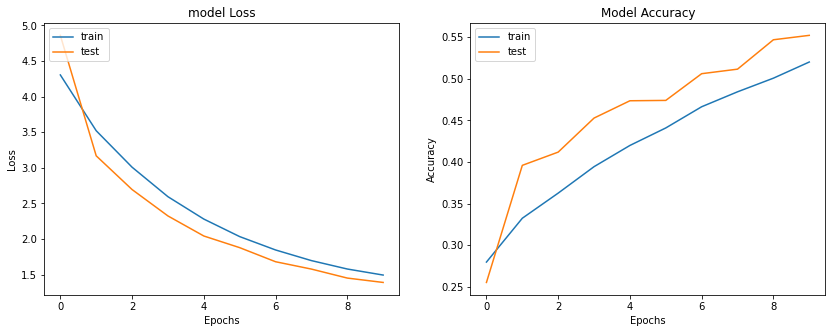

In [85]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(mod.history['accuracy'])
plt.plot(mod.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(mod.history['loss'])
plt.plot(mod.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [86]:
train_loss, train_accu = our_model.evaluate(train_set)
test_loss, test_accu = our_model.evaluate(test_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

113/113 [==============================] - 24s 212ms/step - loss: 1.3899 - accuracy: 0.5522
final train accuracy = 56.19 , validation accuracy = 55.22


Confusion Matrix
[[105   0  62 271 247 135 138]
 [ 18   0   6  30  24  15  18]
 [123   0  71 269 258 150 153]
 [198   2  97 499 479 228 271]
 [141   1  96 352 311 145 187]
 [140   1  88 364 310 151 193]
 [118   1  46 200 221 100 145]]
Classification Report
              precision    recall  f1-score   support

       angry       0.12      0.11      0.12       958
     disgust       0.00      0.00      0.00       111
        fear       0.15      0.07      0.10      1024
       happy       0.25      0.28      0.27      1774
     neutral       0.17      0.25      0.20      1233
         sad       0.16      0.12      0.14      1247
    surprise       0.13      0.17      0.15       831

    accuracy                           0.18      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.18      0.17      7178



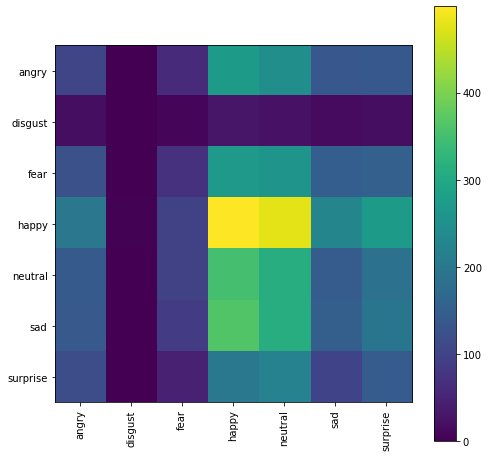

In [87]:
y_pred = our_model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

#from sklearn.metrics import classification_report, confusion_matrix
cm_test = confusion_matrix(test_set.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

#### Using this differnt emotions of music could be played based on the mood of the person